In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dropout, Flatten
from tensorflow.keras.layers import Activation, Flatten, Attention
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.layers import Input, Dense, LSTM, concatenate, dot, Dropout

In [ ]:
df=pd.read_csv('/content/train.csv')
df

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,03-01-2015 01:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,03-01-2015 02:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,03-01-2015 03:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,03-01-2015 04:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,03-01-2015 05:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43770,31-12-2019 19:00,1301.6065,26.635645,0.018421,0.013165,13.184052,25.135645,0.018048,0.064240,3.086798,23.620020,0.016697,0.073425,3.865351,22,1,0
43771,31-12-2019 20:00,1250.9634,26.495935,0.018162,0.014713,13.443892,24.769373,0.017781,0.058838,3.659980,23.284998,0.016606,0.064362,4.171572,22,1,0
43772,31-12-2019 21:00,1193.6802,26.354456,0.017980,0.013836,13.442195,24.479456,0.017606,0.038086,3.769294,23.041956,0.016492,0.054260,4.045283,22,1,0
43773,31-12-2019 22:00,1130.4575,26.166895,0.017965,0.018486,13.420656,24.112207,0.017393,0.020386,3.872397,22.862207,0.016401,0.055557,3.843736,22,1,0


In [ ]:
df['datetime']=pd.to_datetime(df['datetime'])
df['week_day']=df['datetime'].dt.dayofweek
df['date']=df['datetime'].dt.day
df['month']=df['datetime'].dt.month
df['hour']=df['datetime'].dt.hour
df=df.set_index('datetime')

In [ ]:
def add_features(df):
    df['T2M_toc_s']=df['T2M_toc'].shift(-1).fillna(0)
    df['QV2M_toc_s']=df['QV2M_toc'].shift(-1).fillna(0)
    df['TQL_toc_s']=df['TQL_toc'].shift(-1).fillna(0)
    df['W2M_toc_s']=df['W2M_toc'].shift(-1).fillna(0)
    df['T2M_toc_s']=df['T2M_san'].shift(-1).fillna(0)
    df['QV2M_san_s']=df['QV2M_san'].shift(-1).fillna(0)
    df['TQL_san_s']=df['TQL_san'].shift(-1).fillna(0)
    df['W2M_san_s']=df['W2M_san'].shift(-1).fillna(0)
    df['T2M_dav_s']=df['T2M_dav'].shift(-1).fillna(0)
    df['QV2M_dav_s']=df['QV2M_dav'].shift(-1).fillna(0)
    df['TQL_dav_s']=df['TQL_dav'].shift(-1).fillna(0)
    df['W2M_dav_s']=df['W2M_dav'].shift(-1).fillna(0)
    df['Holiday_ID_s']=df['Holiday_ID'].shift(-1).fillna(0)
    df['holiday_s']=df['holiday'].shift(-1).fillna(0)
    df['school_s']=df['school'].shift(-1).fillna(0)
    
    df['T2M_toc_s1']=df['T2M_toc'].shift(-2).fillna(0)
    df['QV2M_toc_s1']=df['QV2M_toc'].shift(-2).fillna(0)
    df['TQL_toc_s1']=df['TQL_toc'].shift(-2).fillna(0)
    df['W2M_toc_s1']=df['W2M_toc'].shift(-2).fillna(0)
    df['T2M_toc_s1']=df['T2M_san'].shift(-2).fillna(0)
    df['QV2M_san_s1']=df['QV2M_san'].shift(-2).fillna(0)
    df['TQL_san_s1']=df['TQL_san'].shift(-2).fillna(0)
    df['W2M_san_s1']=df['W2M_san'].shift(-2).fillna(0)
    df['T2M_dav_s1']=df['T2M_dav'].shift(-2).fillna(0)
    df['QV2M_dav_s1']=df['QV2M_dav'].shift(-2).fillna(0)
    df['TQL_dav_s1']=df['TQL_dav'].shift(-2).fillna(0)
    df['W2M_dav_s1']=df['W2M_dav'].shift(-2).fillna(0)
    
    for i in range(1, 24):
     df[f'nat_demand_lag_{i}'] = df['nat_demand'].shift(i).fillna(0)
    return df

In [ ]:
df=add_features(df)

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df)
df_for_training_scaled = scaler.transform(df)
df_for_training_scaled

array([[-1.10462746e+00, -9.17472138e-01,  1.28974893e-01, ...,
        -6.06233633e+00, -6.05969604e+00, -6.05704431e+00],
       [-1.40522847e+00, -8.96895091e-01,  1.77423318e-01, ...,
        -6.06233633e+00, -6.05969604e+00, -6.05704431e+00],
       [-1.46675841e+00, -8.73879831e-01,  2.49593895e-01, ...,
        -6.06233633e+00, -6.05969604e+00, -6.05704431e+00],
       ...,
       [ 4.94960060e-02, -6.21376909e-01, -2.46890011e-01, ...,
        -2.01826360e-01,  1.34583999e-03,  3.80153483e-01],
       [-2.77218287e-01, -7.34901633e-01, -2.56234491e-01, ...,
        -4.76246821e-01, -2.01618448e-01,  1.47278239e-03],
       [-5.14847567e-01, -8.50218071e-01, -1.88877259e-01, ...,
        -6.25641348e-01, -4.75925012e-01, -2.01406959e-01]])

In [ ]:
def df_to_X_y2(df, window_size=6):
  X = []
  y = []
  for i in range(len(df)-window_size):
    row = [r for r in df[i:i+window_size]]
    X.append(row)
    label = df[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X,y=df_to_X_y2(df_for_training_scaled)

In [ ]:
split=int(len(df)*0.9)
X_train=X[:split]
y_train=y[:split]
X_test=X[split:]
y_test=y[split:]
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((39397, 6, 68), (39397,), (4372, 6, 68), (4372,))

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# Define the parameter grid for GridSearchCV
param_grid = {
    'lstm_units': [64, 128],
    'dropout_rate': [0.2, 0.4],
    'activation': ['relu', 'tanh']
}

# Define the LSTM model as a function to be used with GridSearchCV
def create_lstm_model(lstm_units=64, dropout_rate=0.2, activation='relu'):
    input_shape = (X_train.shape[1], X_train.shape[2])
    inputs = Input(shape=input_shape)

    lstm_out = LSTM(lstm_units, return_sequences=True)(inputs)
    lstm_out = Dropout(dropout_rate)(lstm_out)

    attn_weights = dot([lstm_out, lstm_out], axes=[2, 2])
    attn_weights = Activation('softmax')(attn_weights)

    context = dot([attn_weights, lstm_out], axes=[2, 1])

    output = concatenate([context, lstm_out])
    output = Dense(32, activation=activation)(output)
    output = Dropout(dropout_rate)(output)
    output = Dense(1)(output)

    model = Model(inputs=inputs, outputs=output)
    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

# Create a GridSearchCV object
lstm_model = KerasRegressor(build_fn=create_lstm_model, epochs=100, batch_size=32, verbose=0)
grid = GridSearchCV(estimator=lstm_model, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=3)

# Fit the GridSearchCV object to the training data
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and best RMSE score
print("Best Parameters: ", grid_result.best_params_)
print("Best RMSE Score: ", -grid_result.best_score_)

<ipython-input-10-b43df83554ee>:35: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_model = KerasRegressor(build_fn=create_lstm_model, epochs=100, batch_size=32, verbose=0)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._k

In [ ]:
input_shape = (X_train.shape[1], X_train.shape[2])
inputs = Input(shape=input_shape)

lstm_out = LSTM(64, return_sequences=True)(inputs)
lstm_out = Dropout(0.2)(lstm_out)

attn_weights = dot([lstm_out, lstm_out], axes=[2, 2])
attn_weights = Activation('softmax')(attn_weights)

context = dot([attn_weights, lstm_out], axes=[2, 1])

output = concatenate([context, lstm_out])
output = Dense(32, activation='relu')(output)
output = Dropout(0.2)(output)
output = Flatten()(output)
output = Dense(1)(output)

model = Model(inputs=inputs, outputs=output)
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
'''model = Sequential()
model.add(Bidirectional(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences=True)))
model.add(Bidirectional(LSTM(32, activation='relu', return_sequences=True)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')'''

"model = Sequential()\nmodel.add(Bidirectional(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences=True)))\nmodel.add(Bidirectional(LSTM(32, activation='relu', return_sequences=True)))\nmodel.add(Dropout(0.2))\nmodel.add(Flatten())\nmodel.add(Dense(64, activation='relu'))\nmodel.add(Dense(8, activation='relu'))\nmodel.add(Dense(1))\nmodel.compile(optimizer='adam', loss='mse')"

In [ ]:
'''model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.summary()'''

"model = Sequential()\nmodel.add(LSTM(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))\nmodel.add(LSTM(32, activation='relu', return_sequences=True))\nmodel.add(LSTM(32, activation='relu', return_sequences=False))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(1))\n\nmodel.compile(optimizer='adam', loss='mse')\nmodel.summary()"

Epoch 1/100
1109/1109 [==============================] - 18s 13ms/step - loss: 0.1033 - val_loss: 0.0625
Epoch 2/100
1109/1109 [==============================] - 10s 9ms/step - loss: 0.0460 - val_loss: 0.0528
Epoch 3/100
1109/1109 [==============================] - 9s 8ms/step - loss: 0.0356 - val_loss: 0.0374
Epoch 4/100
1109/1109 [==============================] - 10s 9ms/step - loss: 0.0309 - val_loss: 0.0380
Epoch 5/100
1109/1109 [==============================] - 10s 9ms/step - loss: 0.0278 - val_loss: 0.0353
Epoch 6/100
1109/1109 [==============================] - 10s 9ms/step - loss: 0.0258 - val_loss: 0.0373
Epoch 7/100
1109/1109 [==============================] - 9s 8ms/step - loss: 0.0234 - val_loss: 0.0264
Epoch 8/100
1109/1109 [==============================] - 10s 9ms/step - loss: 0.0226 - val_loss: 0.0276
Epoch 9/100
1109/1109 [==============================] - 10s 9ms/step - loss: 0.0220 - val_loss: 0.0321
Epoch 10/100
1109/1109 [==============================] - 11s 10m

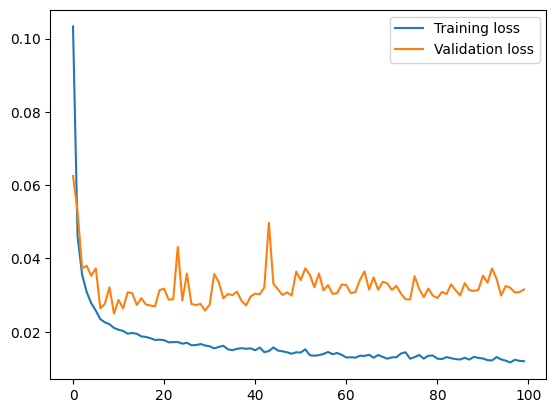

In [ ]:
# fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=2,metrics=['mse'])

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
Y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
msee = mean_squared_error(y_test, Y_pred)

rmse = np.sqrt(msee)
rmse

137/137 [==============================] - 1s 3ms/step


0.12225067464200233

In [ ]:
def plot_predictions(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions),np.sqrt(mse(y, predictions))

137/137 [==============================] - 1s 5ms/step


(      Predictions   Actuals
 0        0.676070  0.747513
 1        0.533676  0.592319
 2        0.248049  0.250698
 3       -0.141461 -0.055278
 4       -0.431219 -0.410539
 ...           ...       ...
 4367     0.588828  0.607224
 4368     0.362147  0.345517
 4369     0.054255  0.049496
 4370    -0.171734 -0.277218
 4371    -0.415019 -0.514848
 
 [4372 rows x 2 columns],
 0.01494522745042471,
 0.12225067464200233)

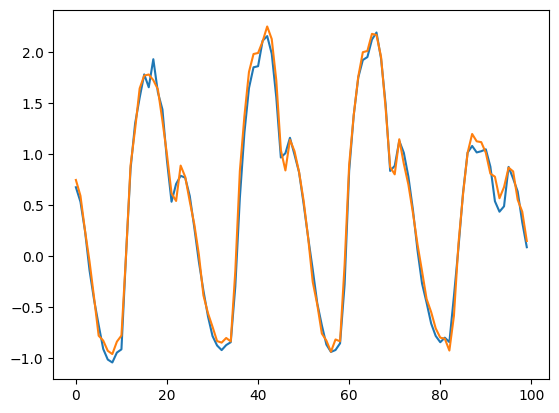

In [ ]:
plot_predictions(model, X_test, y_test)
 

In [ ]:
predictions = model.predict(X_test)
y_test=y_test.reshape(-1,1)
y_test.shape



137/137 [==============================] - 1s 4ms/step


(4372, 1)

In [ ]:
d=df_for_training_scaled[-4372:,:]
Y_predicted = np.concatenate((predictions,d[-4372:,1:]), axis =1)
Y_tested = np.concatenate((y_test, d[-4372:,1:]), axis = 1)

In [ ]:
Y_predicted = scaler.inverse_transform(Y_predicted)
Y_tested = scaler.inverse_transform(Y_tested)
Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

Y_tested (4372, 1)
Y_predicted (4372, 1)


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
mse = mean_squared_error(Y_tested, Y_predicted)
mae=mean_absolute_error(Y_tested,Y_predicted)
mape=mean_absolute_percentage_error(Y_tested,Y_predicted)
rmse = np.sqrt(mse)
print('mean squared error: ',mse)
print('root mean squared error: ',rmse)
print('mean absolute error: ',mae)
print('mean absolute pourcentage error : ',mape)

mean squared error:  559.6446269003677
root mean squared error:  23.656809313607102
mean absolute error:  17.53684997358005
mean absolute pourcentage error :  0.01416046304894642


In [ ]:
df2=pd.DataFrame(data={'Actuals': Y_tested.flatten(),'Predictions': Y_predicted.flatten()})
df2=df2.set_index(df[-4372:].index)
df2

,Actuals,Predictions
datetime,,
2019-02-07 20:00:00,1328.7539,1314.928899
2019-02-07 21:00:00,1298.7222,1287.374106
2019-02-07 22:00:00,1232.6149,1232.102381
2019-02-07 23:00:00,1173.4053,1156.728064
2019-03-07 00:00:00,1104.6586,1100.656769
...,...,...
2019-12-31 19:00:00,1301.6065,1298.046686
2019-12-31 20:00:00,1250.9634,1254.181508
2019-12-31 21:00:00,1193.6802,1194.601056


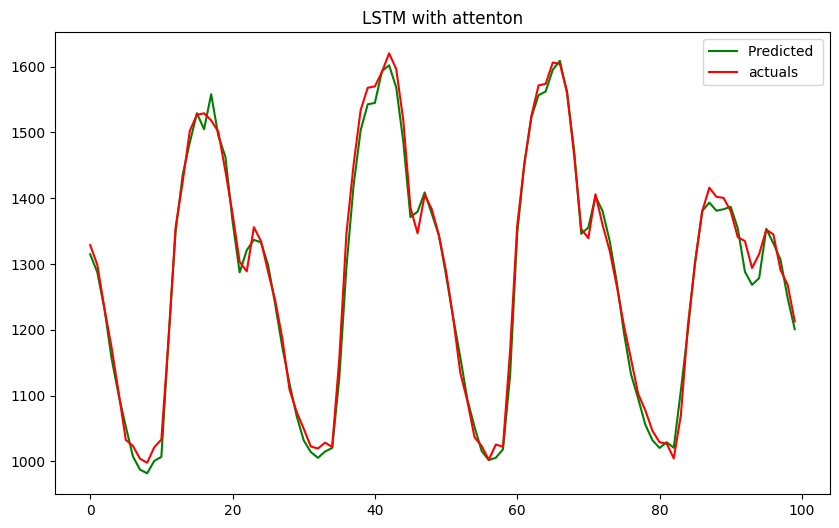

In [ ]:
plt.figure(figsize=(10,6))  
plt.plot(Y_predicted[:100,:], color= 'green',label = 'Predicted ')
plt.plot(Y_tested [:100,:], color = 'red',label = 'actuals')
plt.title('LSTM with attenton')
plt.legend()
plt.show()

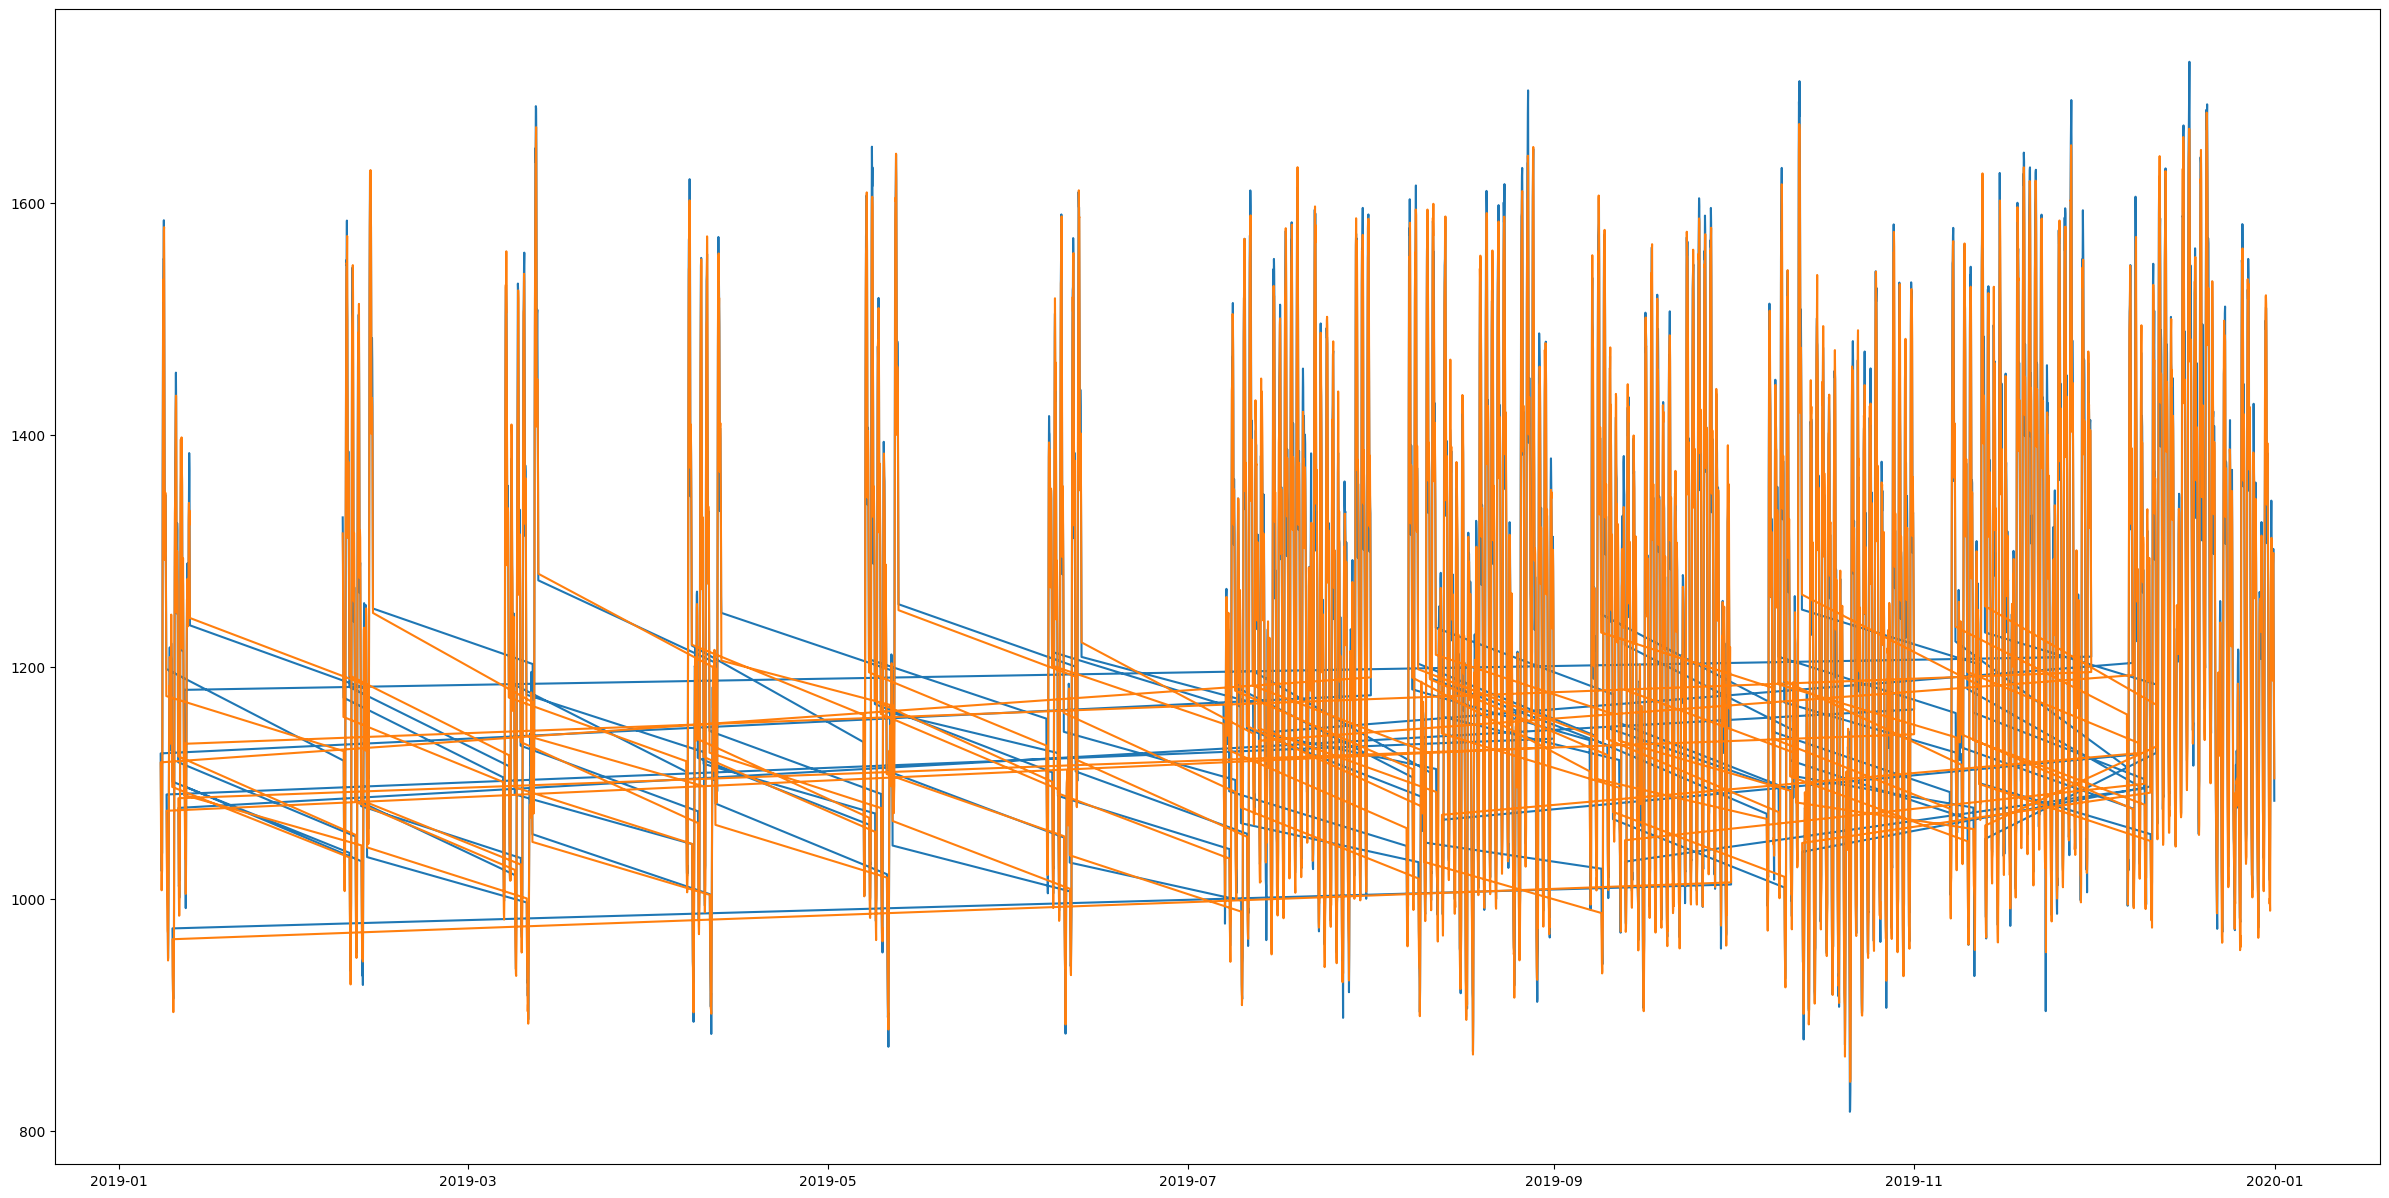

In [ ]:
plt.figure(figsize=(30,15)) 
plt.plot(df2)